In [31]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg
import os
import json

# load demand data
# DATA_NAME = 'ndf50_mldat6e8_university'
DATA_NAME = 'university_chancap500_numchans1_mldat2e6_bidirectional'
path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/benchmark_data/{}_benchmark_data_v2.json'.format(DATA_NAME)
benchmark_data = json.loads(tpg.load_data_from_json(path_to_benchmark_data))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Time to load data from /home/zciccwf/phd_project/projects/trafpy/trafpy/../data/benchmark_data/university_chancap500_numchans1_mldat2e6_bidirectional_benchmark_data_v2.json: 0.5939328670501709 s


In [32]:
%autoreload

# organise into list of demand_data dicts
benchmarks = list(benchmark_data.keys())
demand_data_list = []
loads = []
for benchmark in benchmarks:
    for load in benchmark_data[benchmark]:
        for repeat in benchmark_data[benchmark][load]:
            demand_data = benchmark_data[benchmark][load][repeat]
            demand_data_list.append(demand_data)
            loads.append(load)
num_sets_of_demand_data = len(demand_data_list)
print('Number of sets of demand data: {}'.format(num_sets_of_demand_data))
print(demand_data_list[0])

Number of sets of demand data: 5
{'flow_id': ['flow_3122', 'flow_522', 'flow_672', 'flow_1180', 'flow_2540', 'flow_2476', 'flow_2652', 'flow_2538', 'flow_814', 'flow_1920', 'flow_1803', 'flow_2080', 'flow_379', 'flow_1158', 'flow_2579', 'flow_618', 'flow_2252', 'flow_2100', 'flow_1759', 'flow_830', 'flow_1418', 'flow_156', 'flow_3266', 'flow_2649', 'flow_3103', 'flow_2130', 'flow_2608', 'flow_2049', 'flow_1084', 'flow_3011', 'flow_1416', 'flow_2973', 'flow_599', 'flow_291', 'flow_2347', 'flow_1035', 'flow_299', 'flow_2762', 'flow_842', 'flow_2536', 'flow_759', 'flow_1129', 'flow_2610', 'flow_1385', 'flow_1577', 'flow_1916', 'flow_2240', 'flow_94', 'flow_1457', 'flow_1825', 'flow_2144', 'flow_1087', 'flow_609', 'flow_878', 'flow_1666', 'flow_1056', 'flow_1565', 'flow_1547', 'flow_2547', 'flow_1400', 'flow_904', 'flow_827', 'flow_2291', 'flow_915', 'flow_2695', 'flow_1573', 'flow_2689', 'flow_2932', 'flow_1553', 'flow_1700', 'flow_2922', 'flow_2056', 'flow_2299', 'flow_2825', 'flow_331',

+----+--------+---------+-------+-------------+-------------+-------------+--------+------------+-------------+
|    | Name   |   Flows |   1st |        Last |    Duration |        Info |   Load |   Smallest |     Largest |
|----+--------+---------+-------+-------------+-------------+-------------+--------+------------+-------------|
|  0 | demand |   26400 |     0 | 2.72478e+06 | 2.72478e+06 | 8.17433e+08 |    300 |          1 | 1.90671e+07 |
|  1 | demand |   52800 |     0 | 2.33183e+06 | 2.33183e+06 | 1.3991e+09  |    600 |          1 | 1.00425e+07 |
|  2 | demand |  105600 |     0 | 3.36868e+06 | 3.36868e+06 | 3.03182e+09 |    900 |          1 | 1.17677e+07 |
|  3 | demand |  105600 |     0 | 2.14649e+06 | 2.14649e+06 | 2.57579e+09 |   1200 |          1 | 4.77151e+06 |
|  4 | demand |  105600 |     0 | 2.04973e+06 | 2.04973e+06 | 3.07459e+09 |   1500 |          1 | 7.07364e+06 |
+----+--------+---------+-------+-------------+-------------+-------------+--------+------------+-------

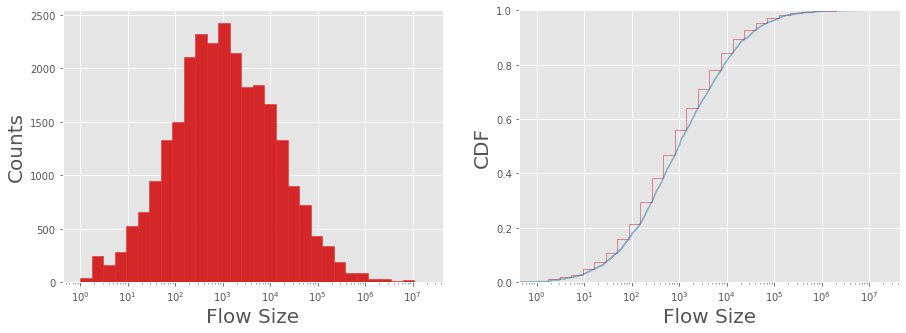

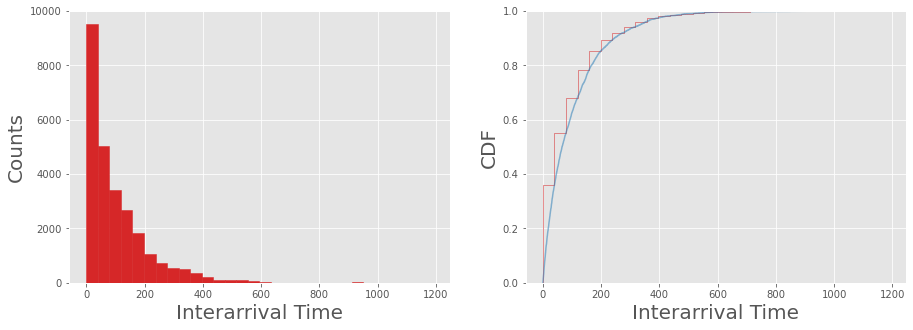

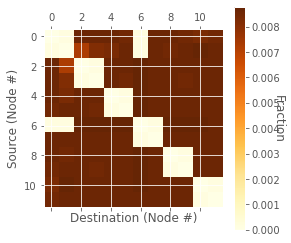

<Figure size 432x288 with 0 Axes>

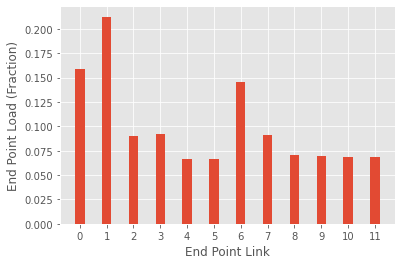

<Figure size 432x288 with 0 Axes>

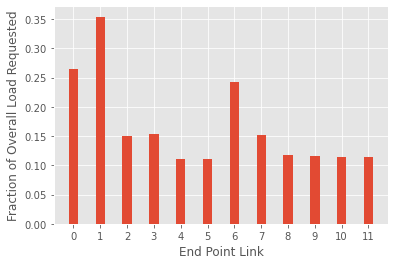

<Figure size 432x288 with 0 Axes>

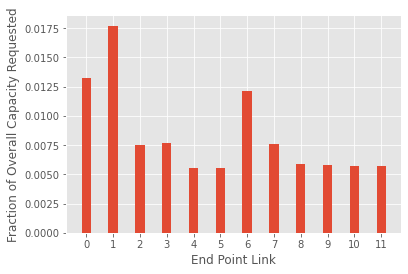

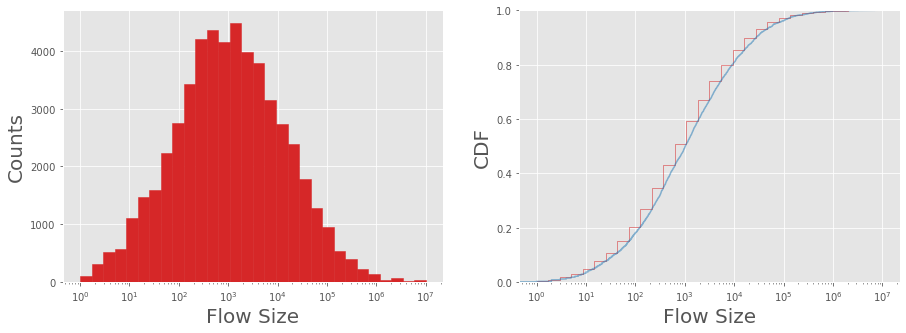

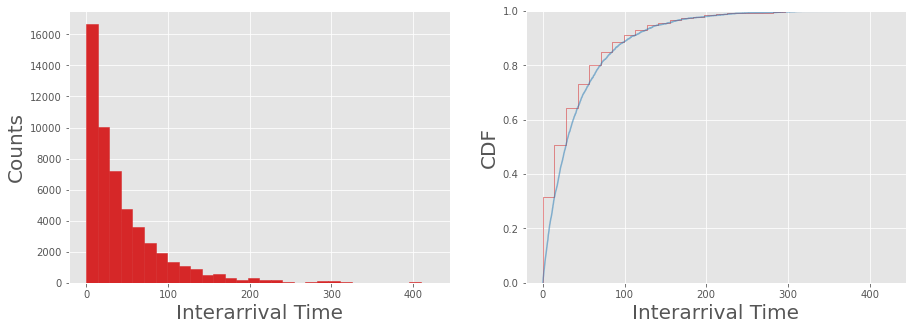

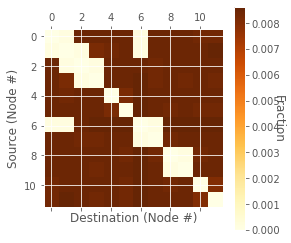

<Figure size 432x288 with 0 Axes>

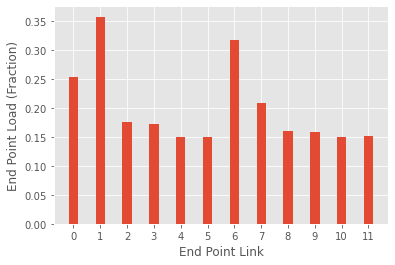

<Figure size 432x288 with 0 Axes>

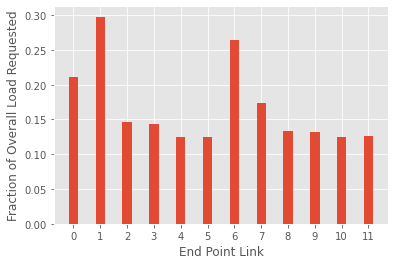

<Figure size 432x288 with 0 Axes>

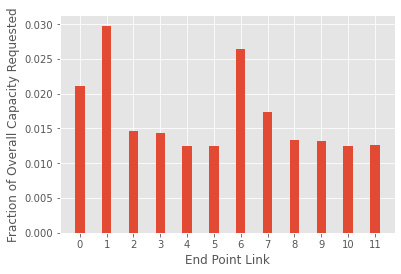

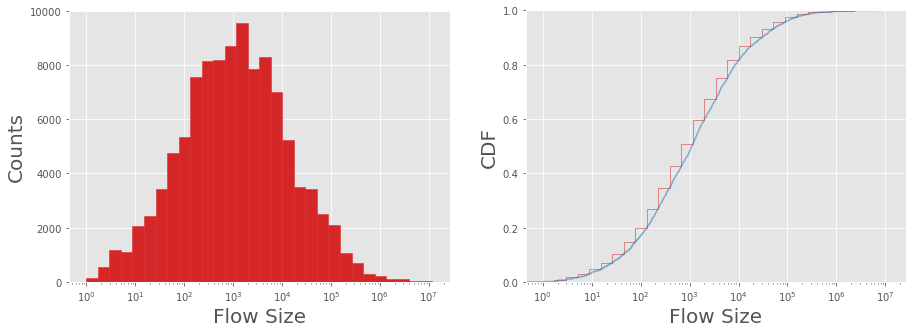

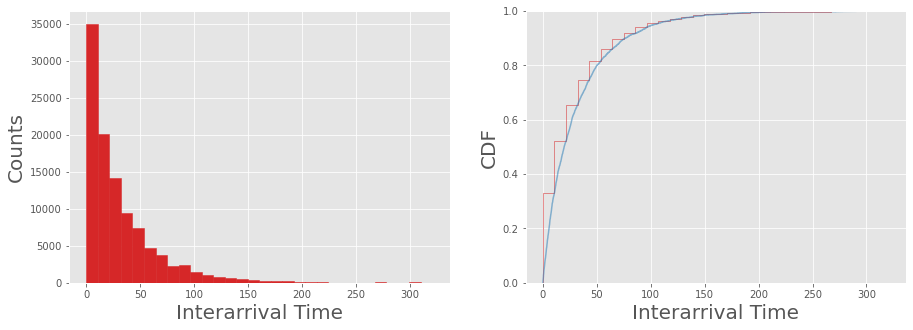

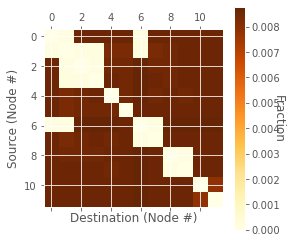

<Figure size 432x288 with 0 Axes>

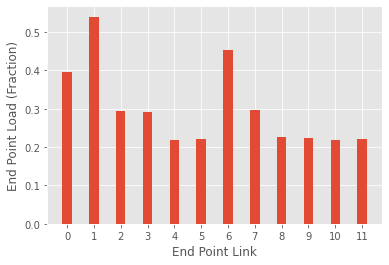

<Figure size 432x288 with 0 Axes>

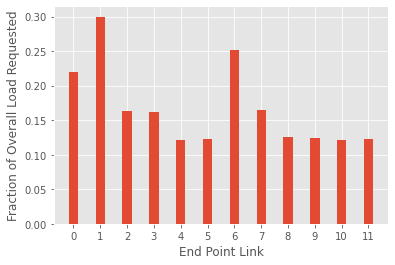

<Figure size 432x288 with 0 Axes>

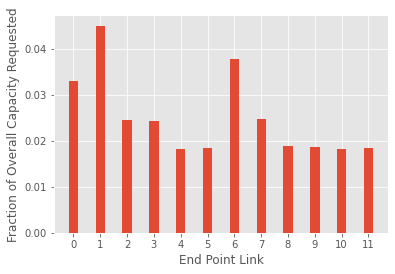

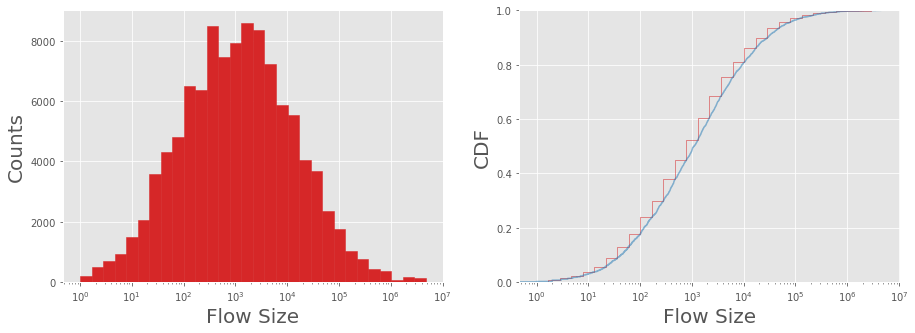

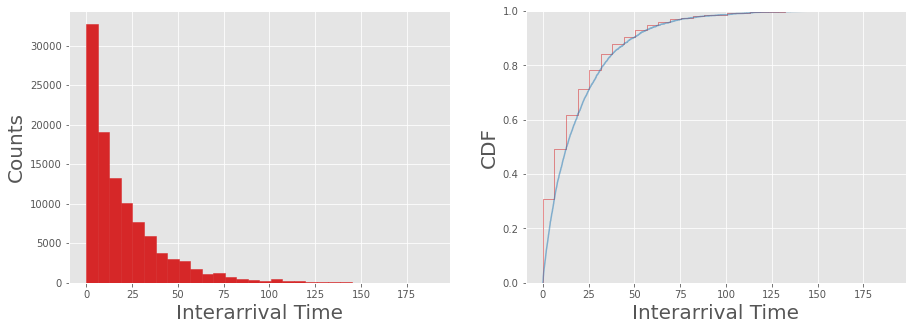

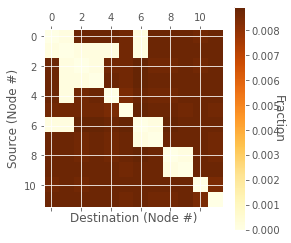

<Figure size 432x288 with 0 Axes>

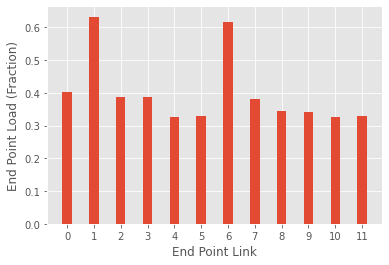

<Figure size 432x288 with 0 Axes>

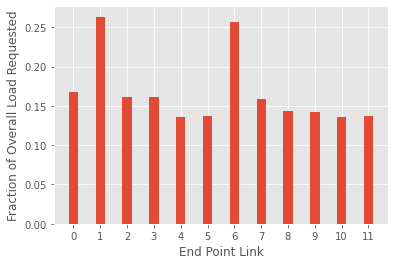

<Figure size 432x288 with 0 Axes>

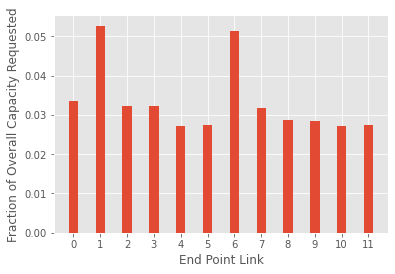

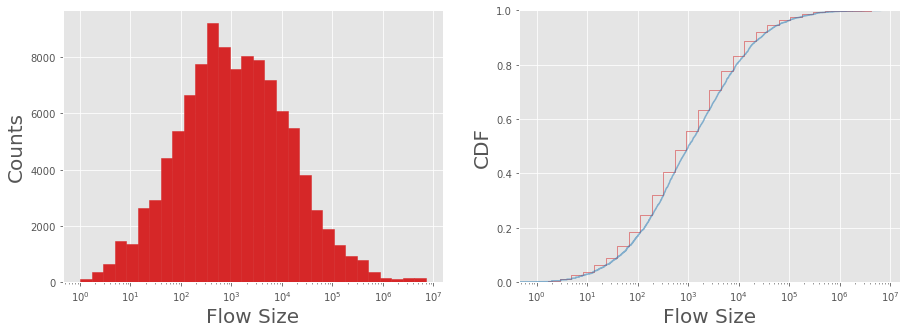

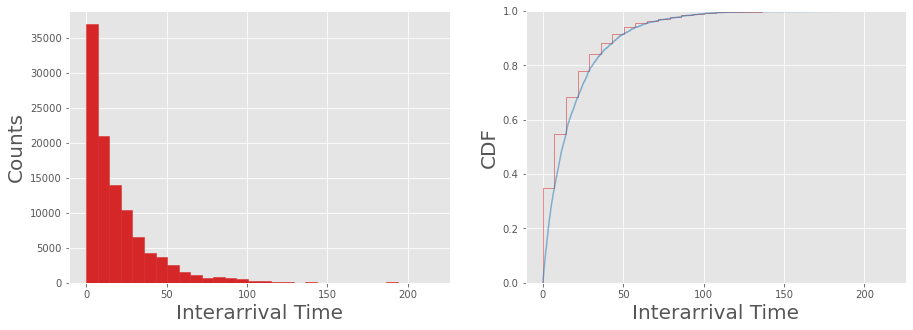

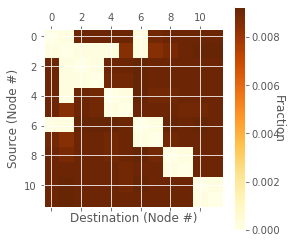

<Figure size 432x288 with 0 Axes>

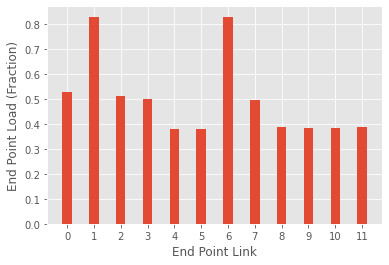

<Figure size 432x288 with 0 Axes>

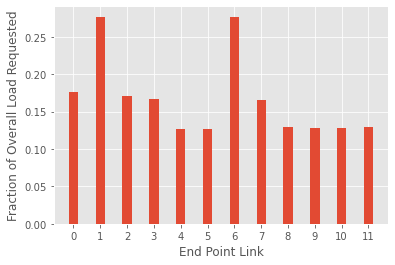

<Figure size 432x288 with 0 Axes>

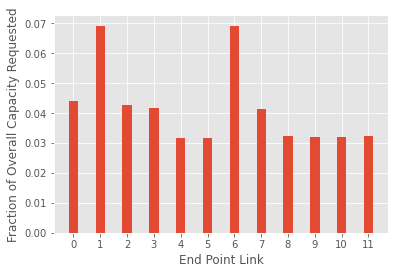

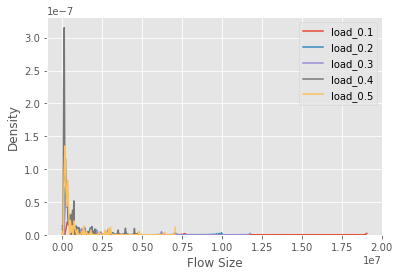

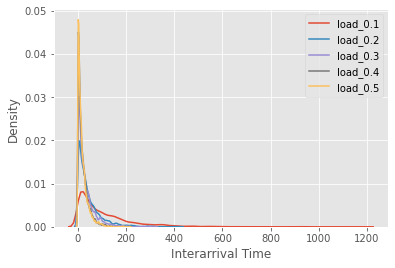

In [36]:
%autoreload
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0}) # disable warnings
from trafpy.generator import Demand, DemandsAnalyser, DemandPlotter, DemandsPlotter

# for plotting
net = tpg.gen_fat_tree(k=3, N=2, num_channels=1, server_to_rack_channel_capacity=500, rack_to_edge_channel_capacity=40000, edge_to_agg_channel_capacity=40000, agg_to_core_channel_capacity=40000, bidirectional_links=True)
slot_size = 1e6

# create demand objects and print analysis summary
demands = []
for demand_data, load in zip(demand_data_list, loads):
    demand = Demand(demand_data, net.graph['endpoints'])
    demand.name = 'load_{}'.format(load) # name for multi-plot jjlegend(s)
    demands.append(demand)
    plotter = DemandPlotter(demand)
    plotter.plot_flow_size_dist(logscale=True, num_bins=30)
    plotter.plot_interarrival_time_dist(logscale=False, num_bins=30)
    plotter.plot_node_dist(eps=net.graph['endpoints'])
    plotter.plot_node_load_dists(eps=net.graph['endpoints'], ep_link_bandwidth=net.graph['ep_link_capacity'])
#     plotter.plot_node_load_dists(eps=net.graph['endpoints'], ep_link_bandwidth=500)
#     plotter.plot_link_loads_vs_time(net, slot_size, demand, mean_period='all')
analyser = DemandsAnalyser(*demands)
analyser.compute_metrics(print_summary=True)

plotters = DemandsPlotter(*demands)
_ = plotters.plot_flow_size_dists(logscale=False)
_ = plotters.plot_interarrival_time_dists(logscale=False)

In [23]:
print(demand.num_demands)
print(len(demand['flow_id']))

30


TypeError: 'Demand' object is not subscriptable

In [ ]:
_ = plotters.plot_link_loads_vs_time_for_different_loads(logscale=False)

In [ ]:
%autoreload
print('Keys of first demand data set:\n{}'.format(demand_data_list[0].keys()))
# print('\nStructure of first demand data set:\n{}'.format(demand_data_list[0]))

In [ ]:
%autoreload
for benchmark in benchmarks:
    print(benchmark_data[benchmark].keys())
    for load in list(benchmark_data[benchmark].keys()):
        for repeat in benchmark_data[benchmark][load]:
            print('benchmark: {} | load: {} | repeat: {}'.format(benchmark,load,repeat))

In [ ]:
%autoreload
from trafpy.generator import Demand
import sys
import json

demand = Demand(demand_data_list[-1])
for SLOT_SIZE in [1e4]:
    slots_dict = demand.get_slots_dict(SLOT_SIZE, print_info=True)

In [ ]:
slots_dict[0]